# Describe and illustrate some properties of the Discrete Fourier Transform




In [1]:
# import some standard libraries
import sys
import numpy as np
import scipy as sp
import scipy.signal as sg
import matplotlib.pyplot as plt

print ("sys.version=",sys.version)

sys.version= 3.5.4 | packaged by conda-forge | (default, Dec 18 2017, 06:40:48) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


In [2]:
# You can transform to Fourier (frequency) domain and inverse transform to
# get back.
# Either domain has the same information.

random= [ 0.89933553  0.78670508  0.19770729  0.62981478  0.50593067  0.47279001
  0.38855115  0.58949547  0.45945749  0.17662353  0.6302051   0.90954038
  0.9150673   0.79745648  0.89105943  0.11654198  0.09628704  0.24093369
  0.40380144  0.63389625  0.49073438  0.98261956  0.90672638  0.68252827
  0.03071191  0.50561723  0.88259267  0.85748887  0.92528078  0.74342219
  0.24444134  0.93099435]
random.size= 32
Fs= 100.0
time= [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31]


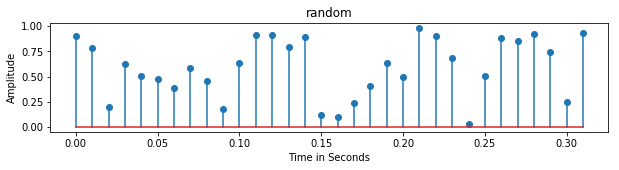

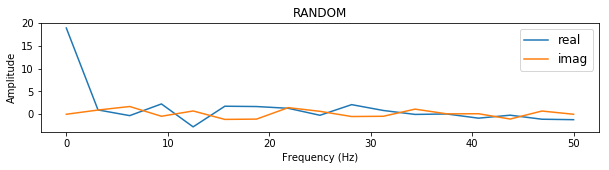

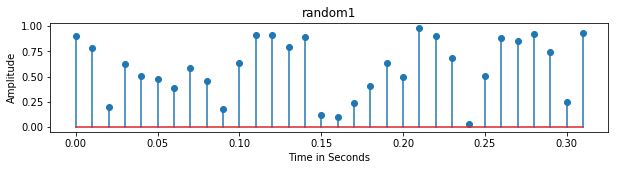

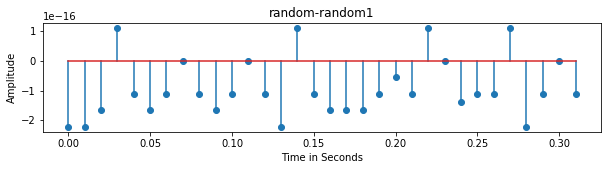

In [3]:
# illustrate with random numbers
random=np.random.rand(32)
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs

print('random=',random)
print('random.size=',random.size)

print ('Fs=',Fs)
time=np.arange(0.0,deltat*random.size,deltat)
print ('time=',time)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('random')
plt.stem(time,random)
plt.show()

RANDOM=np.fft.rfft(random)
frequencies=np.fft.rfftfreq(random.size,d=deltat)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('RANDOM')
plt.plot(frequencies,np.real(RANDOM),label='real')
plt.plot(frequencies,np.imag(RANDOM),label='imag')
ax.legend(fontsize=12)

plt.show()

random1=np.fft.irfft(RANDOM)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('random1')
plt.stem(time,random1)
plt.show()


fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('random-random1')
plt.stem(time,random-random1)
plt.show()

spike= [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
spike.size= 32
Fs= 100.0
time= [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31]


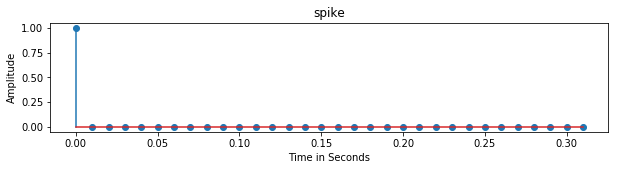

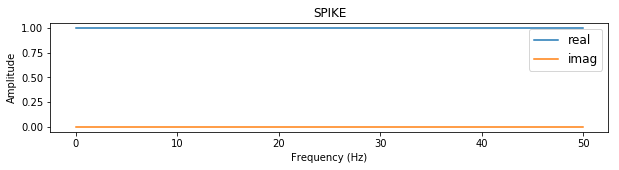

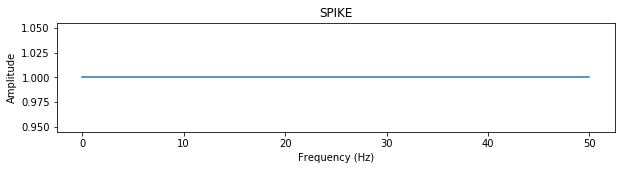

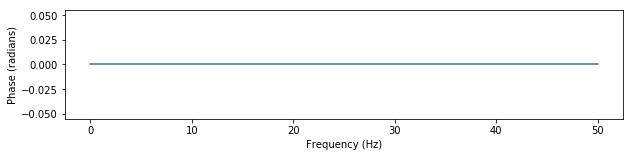

In [4]:
# The Fourier transform of a spike at t=0 is constant for all frequencies

# Make a time series that is all zeros
spike=np.zeros(32)
# make the first sample 1.0
spike[0]=1.0
# define the sample rate (the Frequency of Sampling or Fs) to be 100 times per second
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs

print('spike=',spike)
print('spike.size=',spike.size)

print ('Fs=',Fs)
time=np.arange(0.0,deltat*spike.size,deltat)
print ('time=',time)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('spike')
plt.stem(time,spike)
plt.show()

SPIKE=np.fft.rfft(spike)
frequencies=np.fft.rfftfreq(spike.size,d=deltat)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('SPIKE')
plt.plot(frequencies,np.real(SPIKE),label='real')
plt.plot(frequencies,np.imag(SPIKE),label='imag')
ax.legend(fontsize=12)
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('SPIKE')
plt.plot(frequencies,np.absolute(SPIKE))
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (radians)')
plt.plot(frequencies,np.angle(SPIKE))
plt.show()


In [5]:
# PROPERTY:
# There are the same number of real numbers in spike and its Fourier Dual SPIKE
print ('spike.size=',spike.size)
print ('SPIKE.size=',SPIKE.size)
# np.imag(SPIKE[0]) is always 0.  np.imag(SPIKE[-1]) is always 0.
# the other SPIKE.size-2 need to save real and imag parts of complex numbers

#SPIKE is all complex numbers.  Each complex number has a real and imaginary part.  
#The first and the last point always have zero imaginary part.  We need to have 
#one float for first point, one float for last point and (17-2)*2 float for middle points.
# that makes 32 floats in the Fourier domain, the same number of floats as in the time domain.
# That property always holds.  All the time domain information needs to be coded in the frequency 
# domain and there cannot be space for any extra information.

# you can keep the Fourier information as (real,imaginary) or (amplitude,phase)

spike.size= 32
SPIKE.size= 17


spike= [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
spike.size= 32
Fs= 100.0
tie= [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31]


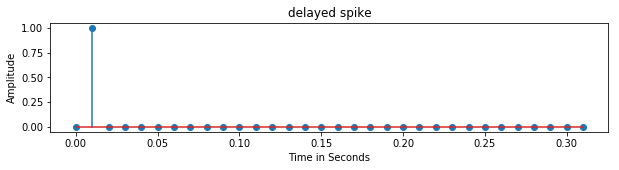

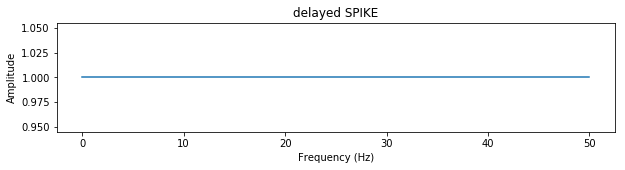

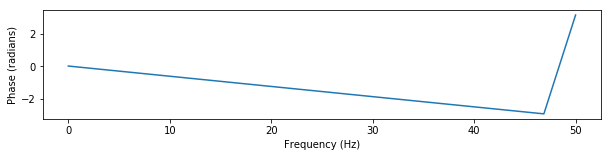

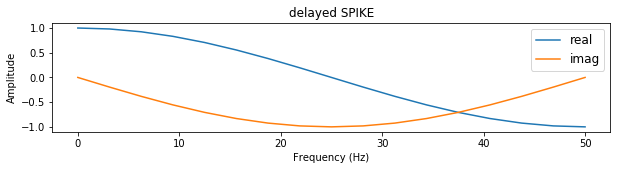

In [6]:
# PROPERTY:
# Delaying a time series causes a linear phase change to the Fourier transform. 
# repeat the Fourier transform of a spike, but put the spike at the second time sample
# Make a time series that is all zeros
spike=np.zeros(32)
# make the first sample 1.0
spike[1]=1.0
# define the sample rate (the Frequency of Sampling or Fs) to be 100 times per second
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs

print('spike=',spike)
print('spike.size=',spike.size)

print ('Fs=',Fs)
time=np.arange(0.0,deltat*spike.size,deltat)
print ('tie=',time)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('delayed spike')
plt.stem(time,spike)
plt.show()

SPIKE=np.fft.rfft(spike)
frequencies=np.fft.rfftfreq(spike.size,d=deltat)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('delayed SPIKE')
plt.plot(frequencies,np.absolute(SPIKE))
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (radians)')
plt.plot(frequencies,np.angle(SPIKE))
plt.show()



fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('delayed SPIKE')
plt.plot(frequencies,np.real(SPIKE),label='real')
plt.plot(frequencies,np.imag(SPIKE),label='imag')
ax.legend(fontsize=12)

plt.show()



The delay of the spike is coded in the phase.  Notice the phase of the last sample  is wrapped.  It is computed as +pi rather than -pi.  Phase is always in the range 
(-pi,pi]. You can see 1/2 cycle in the real and imaginary part.  Notice the first and last frequency
is real (ie imaginary part is zero).

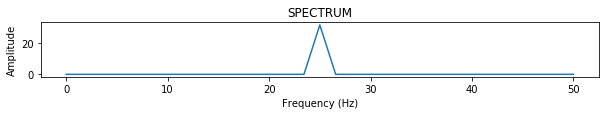

In [7]:
# define a function to fourier transform and plot the spectrum of a time sequence
def plotspectrum(sequence,deltat):
    time=np.arange(0.0,deltat*sequence.size,deltat)

    SEQUENCE=np.fft.rfft(sequence)
    frequencies=np.fft.rfftfreq(sequence.size,d=deltat)

    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.title('SPECTRUM')
    plt.plot(frequencies,np.absolute(SEQUENCE))
    plt.show()

# test is on a 25 hz cosine wave

F=25
length=64
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs

time=np.arange(0.0,deltat*length,deltat)
sequence=np.cos(2*np.pi*F*time)
plotspectrum(sequence,deltat)

F= 20  Hz


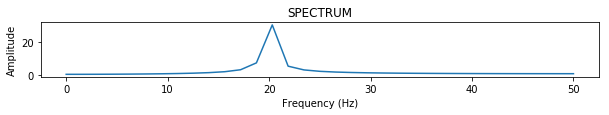

F= 30  Hz


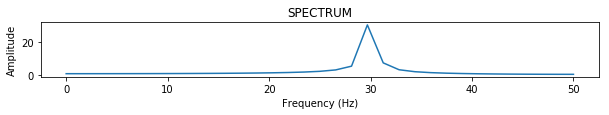

F= 40  Hz


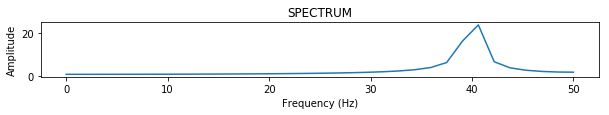

F= 50  Hz


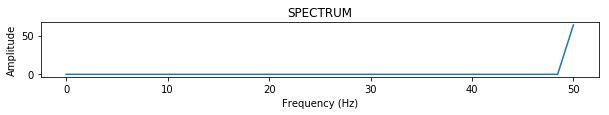

In [8]:
# Do an experiment computing and plotting spectrum for cosine waves with frequencies 
# every 10 hz from 20 to 80.

length=64
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs
for F in np.arange(20,51,10):
    print('F=',F,' Hz')
    time=np.arange(0.0,deltat*length,deltat)
    sequence=np.cos(2*np.pi*F*time)
    plotspectrum(sequence,deltat)


In [9]:
# We can observe the computed spectrums are a little broader than previously.
# That is because the cisine frequency is not exactly one of the Fourier transform 
# frenquencies.  List the frequencies were actual computed in the transform.
frequencies=np.fft.rfftfreq(64,d=deltat)
frequencies


array([  0.    ,   1.5625,   3.125 ,   4.6875,   6.25  ,   7.8125,
         9.375 ,  10.9375,  12.5   ,  14.0625,  15.625 ,  17.1875,
        18.75  ,  20.3125,  21.875 ,  23.4375,  25.    ,  26.5625,
        28.125 ,  29.6875,  31.25  ,  32.8125,  34.375 ,  35.9375,
        37.5   ,  39.0625,  40.625 ,  42.1875,  43.75  ,  45.3125,
        46.875 ,  48.4375,  50.    ])

F= 30  Hz


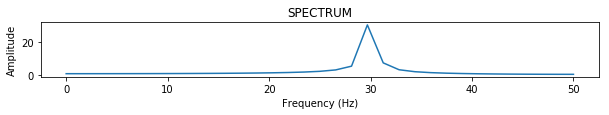

F= 40  Hz


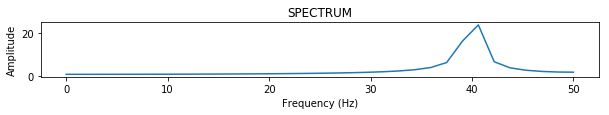

F= 50  Hz


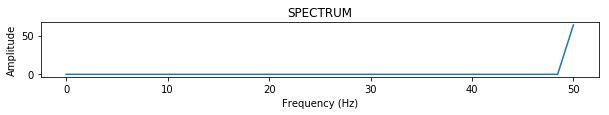

F= 60  Hz


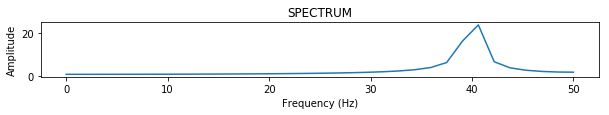

F= 70  Hz


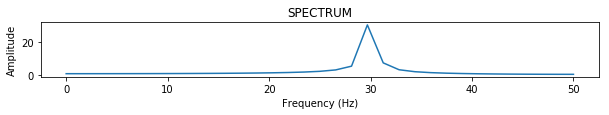

F= 80  Hz


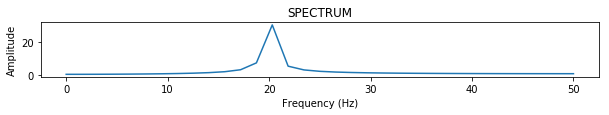

In [10]:
# PROPERTY:
# Aliasing - The highest frequencies you can resolve is the Nyquist frequency, Fnyq. 
#            Fnyq is 1/2 the sample frequency. Frequencies above Fnyq "alias" to 
#            frequencies between 0 and Fnyq.

# Fourier transforms "work" up to the Nyquist frequency:
# Fnyq=1/2 cycle/sample= 1/2 cycle/sample * Fs samples/second = .5 Fs = 50 hz
# Repeat the experiment extending to 80 Hz. To see what happens to higher 
# frequencies.

length=64
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs
for F in np.arange(30,81,10):
    print('F=',F,' Hz')
    time=np.arange(0.0,deltat*length,deltat)
    sequence=np.cos(2*np.pi*F*time)
    plotspectrum(sequence,deltat)

In [11]:
# Frequencies above Nyquist create 'aliases' at Fnyq - (F-Fnyq).  The location is 
# at a mirror arround Fnyq. This is called 'aliasing'.
# We can make a plot showing why a 56.25 Hz cosine wave aliases at 43.75.
# The next plot shows 56.25 and 43.75 Hz cosine waves and the samples every .01 seconds.
# Notice the cosine waves have the same amplitude at the sample times.


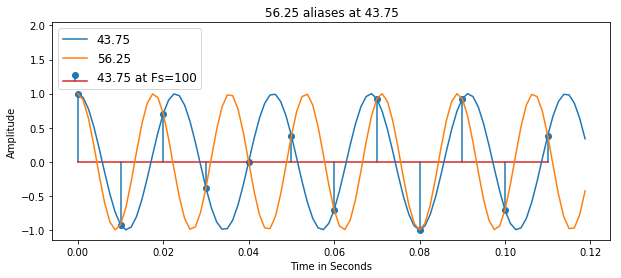

In [12]:
length=12
Fs=100.0
# deltat (Delta time) is the change in time for each sample
deltat=1.0/Fs

F=43.75
time=np.arange(0.0,deltat*length,deltat)
sequence=np.cos(2*np.pi*F*time)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('56.25 aliases at 43.75')
plt.stem(time,sequence,label='43.75 at Fs=100')

# compute and plot sequence at 8 times the rate
time=np.arange(0.0,deltat*length,deltat/8)
F=43.75
sequence=np.cos(2*np.pi*F*time)
plt.plot(time,sequence,label='43.75')

F=56.25
sequence=np.cos(2*np.pi*F*time)
plt.plot(time,sequence,label='56.25')

plt.plot(time[-1],1.9)

ax.legend(fontsize=12)
plt.show()



In [13]:
#The Fourier transform assumes the input trace repeats.  If you have 5.6 seconds of data the Fourier 
#transform assumes it repeats every 5.6 seconds.  Remember the Khan Academy video on the Fourier 
#series.  The frequencies are all multiples of deltaF=1/tmax.  The frequencies will be indx_f*deltaf
#for any integer indx_f and:
#sin(indx_f*deltaf*2*pi*t)=sin(indx_f*deltaf*2*pi*(t+tmax))

In [14]:
# PROPERTY:
# Convolution in time domain is the same as multiplication in the frequency domain.
# The next few cells recreate the time domain highcut filter demonstration from filter_exercise.ipynb
# Then the filter will be applied as a fourier multiply.


In [15]:
# This function designed a highcut filter.  I based it on code I found with a google search
def design_highcutfilter(sample_rate,width=10,ripple=60,cutoff_hz = 10.0):
    '''
    create a zero phase highcut filter ising kaiser window function.
    sample_rate in hz of the data.  250hz is a sample period of .004 seconds
    width=10 width of the transition 
    ripple=60 error in db in the pass and stop band
    cutoff_hz=10 cut off frequency
    
    The frequency response of the filter is approximately 1 in the pass band, 
    below cutoff_hz-width/2, and approximately 0 in the stop band, above cutoff_hz+width/2.
    There is a transition between cutoff_hz-width/2 and cutoff_hz+width/2.
    '''
    #------------------------------------------------
    # Create a FIR filter and apply it to x.
    #------------------------------------------------

    # The Nyquist rate of the signal.
    nyq_rate = sample_rate / 2.0

    # width is the desired width of the transition from pass to stop,
    # relative to the Nyquist rate.  default is design the filter
    # with a 5 Hz transition width.

    # The desired attenuation in the stop band, in dB. Default is 60

    # Compute the order and Kaiser parameter for the FIR filter.
    N, beta = sp.signal.kaiserord(ripple, width/nyq_rate)
    # I want an odd filter length.  If N, the filter length, is even increase by 1.
    if N%2 == 0:
        N=N+1

    # Use firwin with a Kaiser window to create a lowpass FIR filter.
    taps = sp.signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

    #------------------------------------------------
    # Plot the FIR filter coefficients.
    #------------------------------------------------

    plt.figure(1)
    plt.plot(taps, 'bo-', linewidth=2)
    plt.title('Filter Coefficients (%d taps)' % N)
    plt.grid(True)

    #------------------------------------------------
    # Plot the magnitude response of the filter.
    #------------------------------------------------

    plt.figure(2)
    plt.clf()
    w, h = sp.signal.freqz(taps, worN=8000)
    plt.plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency Response')
    plt.ylim(-0.05, 1.05)
    plt.grid(True)

    # Upper inset plot.
    plt.ax1 = plt.axes([0.42, 0.6, .45, .25])
    plt.plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
    plt.xlim(0,8.0)
    plt.ylim(0.9985, 1.001)
    plt.grid(True)

    # Lower inset plot
    plt.ax2 = plt.axes([0.42, 0.25, .45, .25])
    plt.plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
    plt.xlim(12.0, 20.0)
    plt.ylim(0.0, 0.0025)
    plt.grid(True)
    plt.show()

    return taps



In [16]:
# this function applies a zero phase filter by time domain convolution
def apply_0ph_filt(filter,x):
    #filtered_x = sp.signal.lfilter(filter, 1.0, x)
    filtered_x =np.convolve(x,filter,mode='full')
    return filtered_x[(filter.size-1)//2:-(filter.size-1)//2]

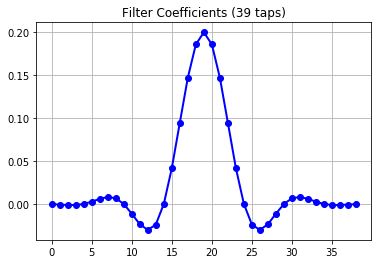

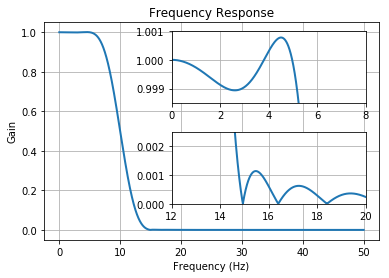

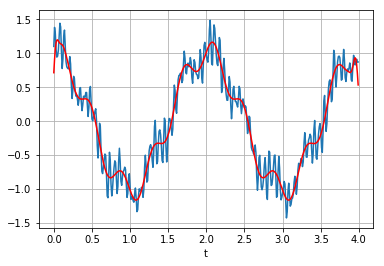

In [17]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = np.arange(nsamples) / sample_rate
# x is sum of frequencies .5, 2.5, 15.3, 16.7, and 23.45 Hz
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)


#-----------------------------------------------------
# Create a FIR filter and apply it to x.
# The filter has a 10 Hz transition centered at 10 hz.
# Frequencies below 5 Hz are not changed.  
# Frequencies above 15 hz are zeroes. 
# The filter transitions from pass band to stop band 
# between 5 and 15 Hz.  
#-----------------------------------------------------
filter=design_highcutfilter(sample_rate,width=10,cutoff_hz = 10.0)

# Use lfilter to filter x with the FIR filter.
filtered_x = apply_0ph_filt(filter,x)
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# Plot the original signal.
plt.plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plt.plot(t, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
#plt.plot(t[taps.size-1:]-delay, filtered_x[taps.size-1:], 'g', linewidth=4)

plt.xlabel('t')
plt.grid(True)

plt.show()



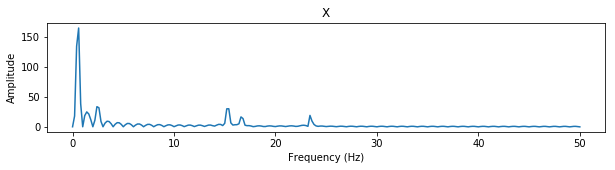

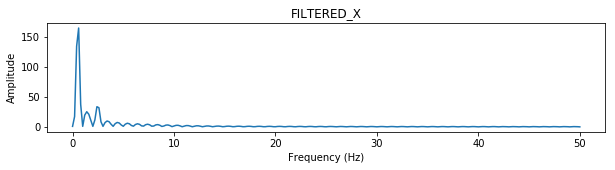

In [18]:
# plot the frequency spectrum of x and filtered_x, and the filter
deltat=1.0/sample_rate

# Data is almost always padded with extra zeros
# before fourier transform
x_padded=np.append(x,np.zeros(100))
X=np.fft.rfft(x_padded)
frequencies=np.fft.rfftfreq(x_padded.size,d=deltat)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('X')
plt.plot(frequencies,np.absolute(X))
plt.show()

filtered_x_padded=np.append(filtered_x,np.zeros(100))
FILTERED_X=np.fft.rfft(filtered_x_padded)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('FILTERED_X')
plt.plot(frequencies,np.absolute(FILTERED_X))
plt.show()

#x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
#        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
#            0.1*np.sin(2*np.pi*23.45*t+.8)


# x is sum of frequencies .5, 2.5, 15.3, 16.7, and 23.45 Hz
# amp                     1    .2   .2   .1        .1 



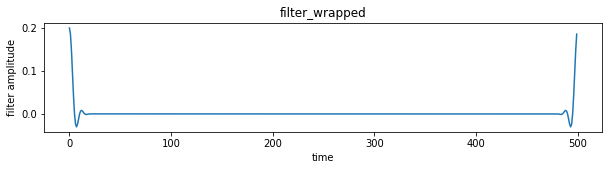

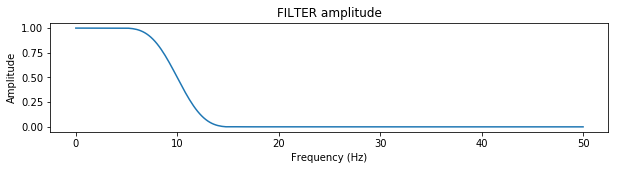

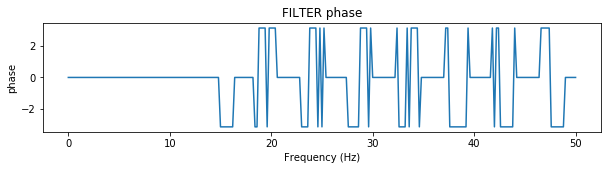

In [19]:
# Now we will apply the filter by frequency domain
# multiplication.  This is a little complicated.  
#There are two steps:
# 1- We need to put the filter into an array that is 
#    the same size as x_padded, the array to be filtered.
# 2- We need to shift "time zero of the filter" to time
#    zero of the array (the first sample).  Samples shifted
#    before time zero must be saved at the end of the array.
#    This preserves the periodic assumption of the Fourier
#    Transform.  This is somtimes called a CIRCULAR time 
#    shift.  

# wrap the filter arround t=0.  Print before and after wrapping
# to check is is being done correctly.
#print (filter)
filter_wrapped=np.zeros_like(x_padded)
# put the center sample and rest of the filter at the beginning
# of the filter_wrapped array.
filter_wrapped[0:filter.size//2+1]=filter[filter.size//2:]
#print (filter_wrapped)
# put the samples after the center sample at the end filter_wrapped.
# i.e. put the negative time coefficients at the end of the array.
filter_wrapped[-(filter.size)//2+1:]=filter[:filter.size//2]
#print (filter_wrapped)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('time')
ax.set_ylabel('filter amplitude')
plt.title('filter_wrapped')
plt.plot(filter_wrapped)
plt.show()



FILTER=np.fft.rfft(filter_wrapped)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('FILTER amplitude')
plt.plot(frequencies,np.absolute(FILTER))
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('phase')
plt.title('FILTER phase')
plt.plot(frequencies,np.angle(FILTER))
plt.show()

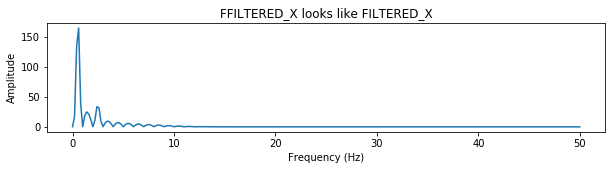

In [20]:
# filter in the frequency domain by multiplication
FFILTERED_X=X*FILTER #numpy allows two vectors to be multiplied like this

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('FFILTERED_X looks like FILTERED_X')
plt.plot(frequencies,np.absolute(FFILTERED_X))
plt.show()


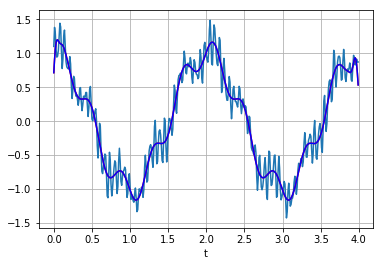

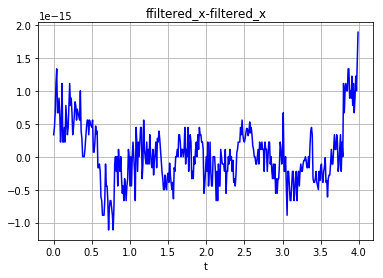

In [21]:
# inverse fast fourier transform and compare with time fdomain convolution
ffiltered_x=np.fft.irfft(FFILTERED_X)

# Plot the original signal.
plt.plot(t, x)
# Plot the frequency filtered signal. 
# Trim off the padding.
plt.plot(t, filtered_x, 'r-')
plt.plot(t, ffiltered_x[:t.size], 'b-')

plt.xlabel('t')
plt.grid(True)

plt.show()

plt.title('ffiltered_x-filtered_x')
# plot difference between filtered_x and ffiltered_x
plt.plot(t, ffiltered_x[:t.size]-filtered_x, 'b-')

plt.xlabel('t')
plt.grid(True)

plt.show()


